# Python-1, Лекция 12

Лектор: Хайбулин Даниэль

Подготовил материал: Хайбулин Даниэль

Сегодня мы поговорим о модулях [NumPy](https://numpy.org/) и [Pandas](https://pandas.pydata.org/): основа анализа данных и машинного обучения. 

## NumPy

Библеотека NumPy предоставляет следующие возможности: 
* работать с многомерными массивами (включая матрицы)
* производить быстрое вычисление математических функций на многомерных массивах

Ядром пакета NumPy является объект `ndarray`.

Важные отличия между NumPy arrays и Python sequences:

* NumPy array имеет фиксированную длину, которая определяется в момент его создания (в отличие от Python lists, которые могут расти динамически)

* Элементы в NumPy array должны быть одного типа

* Можно выполнять операции непосредственно над NumPy arrays

То есть ближайшая знакомая нам структура к `ndarray` - это `array`, в который мы тоже передаем конкретный тип.

In [ ]:
%pip install numpy

In [ ]:
import numpy as np

In [ ]:
np.array([1, 2, 3, 4, 5])

In [ ]:
np.array([1, 2, 3, 4, 5], dtype=np.float32)

In [ ]:
np.float32([1, 2, 3, 4, 5])

### Конструкторы

Есть несколько конструкторов:

- `arange` - аналог `range`

- `linspace` - разбивает отрезок на `n - 1` интервал

- `logspace` - разбивает отрезок по логарифмической шкале

- `zeros` - матрица, заполненный нулями заданной размерности

- `ones` - матрица, заполненный единицами заданной размерности

- `diag` - диагональная матрица

- `empty` - матрица, проинициализированной размерности для дальнейшего заполнения

In [ ]:
np.arange(0, 3, 0.1)

In [ ]:
np.linspace(0, 5, 5)

In [ ]:
np.zeros((3, 3))

In [ ]:
np.ones((3, 3))

In [ ]:
np.diag((1, 2, 3))

In [ ]:
array = np.ones(
    (
        2,
        3,
    )
)
print(
    "Размерность массива - %s, количество размерностей - %d" % (array.shape, array.ndim)
)
array

Чему равны `ndim` и `shape` в следующих случаях?

In [ ]:
print(np.diag([1, 2, 3]).shape, np.diag([1, 2, 3]).ndim)
print(np.zeros((5, 5, 5)).shape, np.zeros((5, 5, 5)).ndim)

Метод `reshape` позволяет преобразовать размерности матрицы без изменения данных внутри нее.

In [ ]:
array = np.arange(0, 6, 0.5)
array

In [ ]:
new_array = array.reshape((2, 6))
new_array

In [ ]:
new_array = array.reshape((4, 3))
new_array

In [ ]:
array[0] = -1
array[0], new_array[0][0]

In [ ]:
raveled_array = new_array.ravel()
raveled_array

Что будет тут?

In [ ]:
print(np.ravel(np.diag([1, 2])))

In [ ]:
print(np.reshape(np.diag([1, 2]), [1, 4]))

### Индексация и нарезание

Базовое нарезание расширяет подход питона к нарезанию на n-мерное пространство. В качестве входных аргумнетов в слайс могут применяться еще и `Ellipsis` и `np.newaxis`. В слайсе мы идем по следующей формуле:

$
0 \leq n_i < d_i
$, где $d_i$ - размерность массива i-го пространства.

In [ ]:
print(array[0])
print(array[-1])
print(array[1:-1])
print(array[1:-1:2])
print(array[::-1])
print(array.shape)
print(array[1:20])

Все слайсы являются `view` над исходным массивом:

In [ ]:
b = array[0]
print(b)
array[0] = 10
print(b)

In [ ]:
print(array[None, 0:, None].ndim, array[None, 0:, None].shape)
array[None, 0:, None]

Индексы и срезы в многомерных массивах не разделяются квадратными скобками - пишем через запятую.

In [ ]:
array[[0, 2, 4, 6, 8, 10]]

In [ ]:
array[[True, False, True, False, True, False, True, False, True, False, True, False]]

In [ ]:
x = np.array([[1, 2, 3]])
y = np.array([1, 2, 3])

print(x.shape, y.shape)

print(np.array_equal(x, y))
print(np.array_equal(x, y[None, :]))

### Способы индексации пространств

`Ellipsis` расширяет количество объектов в слайсе до `ndim`. В слайсе может быть только один `Ellipsis`.

In [ ]:
x = np.array([[[1], [2], [3]], [[4], [5], [6]]])
x[...], x[..., 0], x[0, ...], x[1, 1, 0]

Более того:

In [ ]:
x[:, :, 0] == x[..., 0], x[:, :, 0]

`np.newaxis` - объект, расширяющий размерность на один юнит. Изменённая пространство - индекс `np.newaxis` в слайсе. На самом деле `np.newaxis` - обертка над `None` и можно использовать `None`.

In [ ]:
x[:, np.newaxis, :, :], x[:, np.newaxis, :, :].shape, x[:, None, :, :].shape

Какое же практическое применение?

In [ ]:
x = np.arange(5)
x, x[:, np.newaxis] + x[np.newaxis, :]

In [ ]:
x[:, np.newaxis], x[np.newaxis, :]

### Индексация целочисленными массивами

In [ ]:
x = np.arange(10, 1, -1)
x

In [ ]:
x[np.array([3, 3, 1, 8])], x[np.array([3, 3, -3, 8])]

Если индексы выходят за границу, то пробрасывается `IndexError`

In [ ]:
y = np.arange(35).reshape(5, 7)
y

In [ ]:
y[np.array([0, 2, 4]), np.array([0, 1, 2])]

В этом примере у нас индексовые массивы имеют одинаковые размерность, соответственно мы достаем следующие элементы:
`y[0, 0]`, `y[2, 1]`, `y[4, 2]`

In [ ]:
y[np.array([0, 2, 4]), np.array([0, 1])]

In [ ]:
y[np.array([0, 2, 4]), 1]

In [ ]:
y[np.array([0, 2, 4])]

### Broadcasting

Этот термин объясняет как numpy работает с массивами различных размерностей во время арифметических операций. Массив поменьше "броадкастится" к размерности большего массива, чтобы можно было выполнять операции. Броадкастинг происходит в С, а не в питоне, а следовательно эффективное использование памяти без лишних копий, но есть кейсы где плохо использовать броадкастинг.

In [ ]:
import numpy as np

a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
a * b

In [ ]:
a = np.array([1.0, 2.0, 3.0])
b = 2
a * b

Тут применяется растяжение: `b` дополняется до размерности `a`, чтобы проделать операцию поэлемнетного умножения:

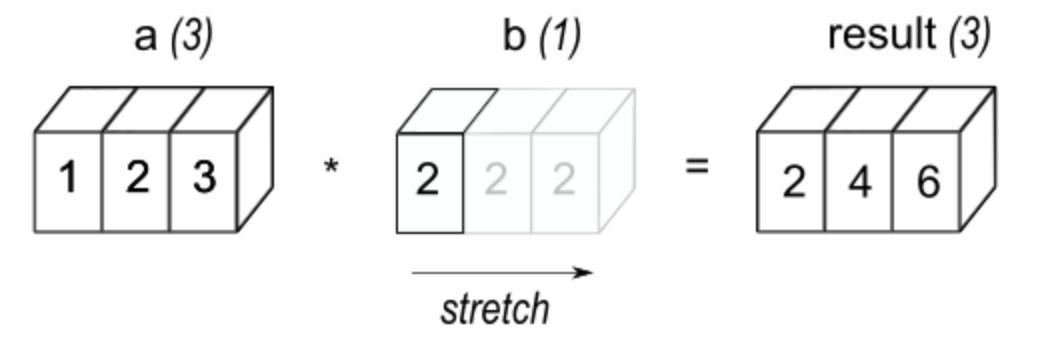

Общий правила броадкаста:

Когда numpy работает с двумя массивами, он сравнивает их размерности поэлементно, начиная с самой правой и идя к левой размерности. Две размерности сравнимы если они одинаковы или одна из них равна единице.

По правилу мы расширяем размерность до большей если одна из них является единицей или отсутствует:

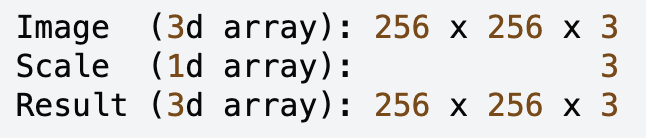

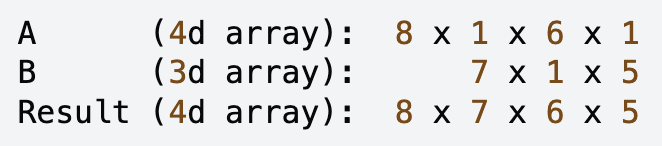

In [ ]:
a = np.array(
    [[0.0, 0.0, 0.0], [10.0, 10.0, 10.0], [20.0, 20.0, 20.0], [30.0, 30.0, 30.0]]
)
b = np.array([1.0, 2.0, 3.0])

a имеется размерность 4x3, b имеет размерность 1x3

In [ ]:
a + b, (a + b).shape

Складывая два массива мы получили итоговую размерность 4x3.

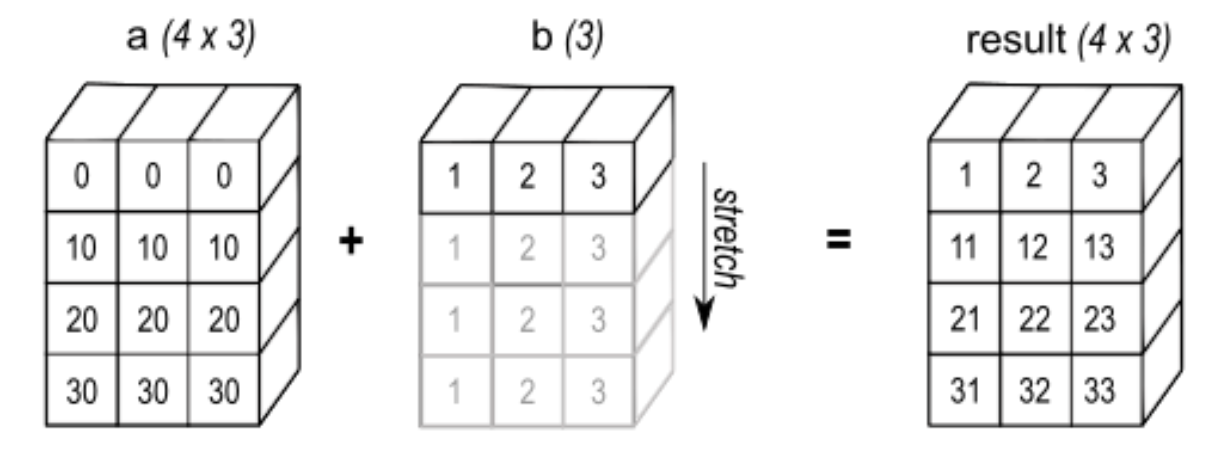

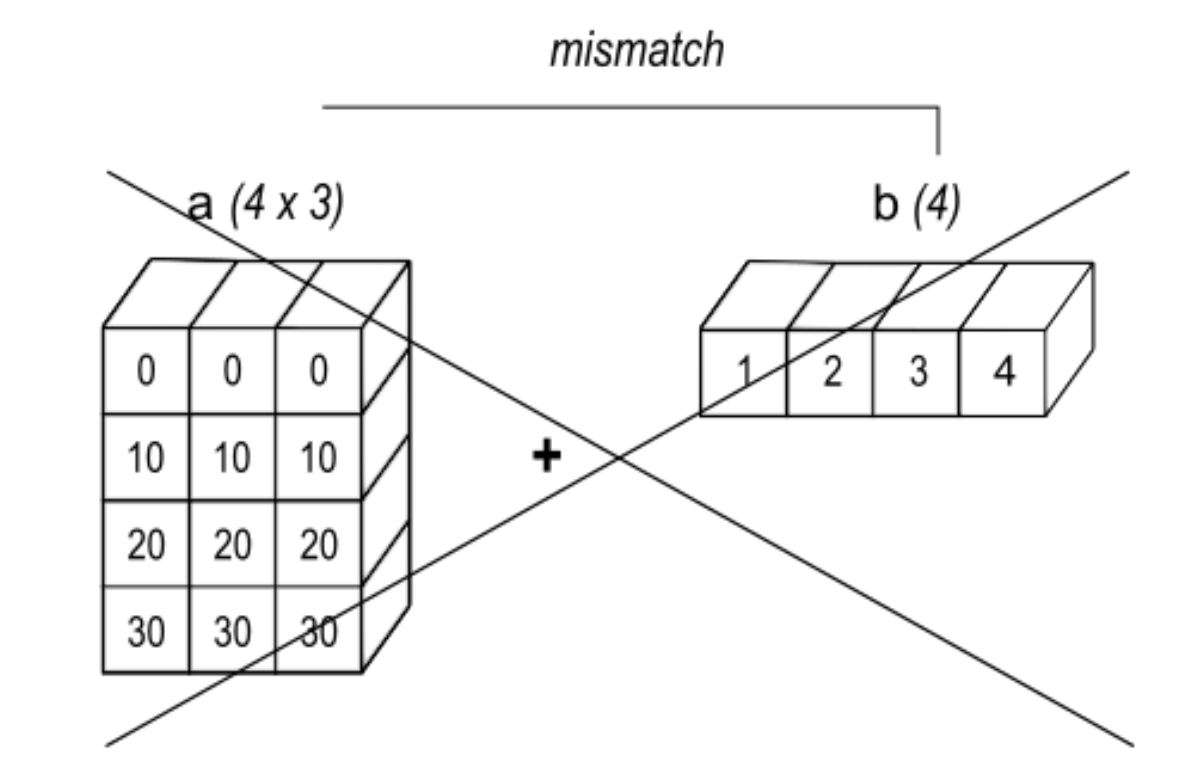

In [ ]:
import numpy as np

a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
a[:, np.newaxis] + b

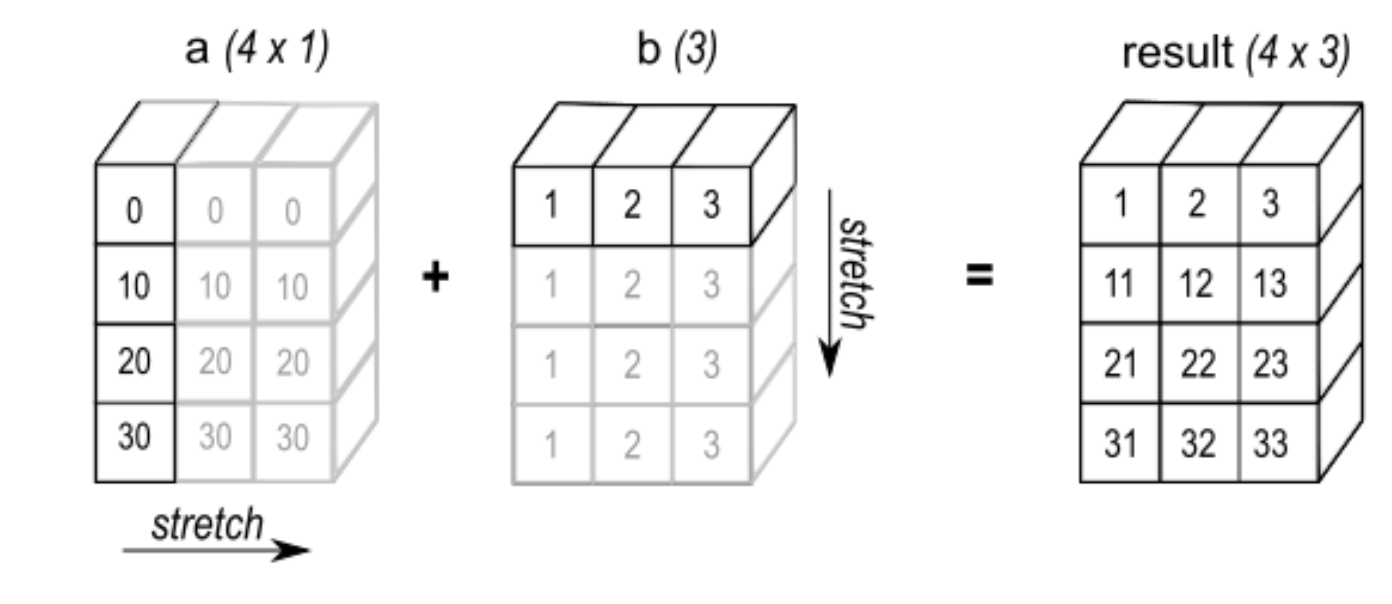

### Индексация броадкастом

In [ ]:
x = np.array([[1, 2], [3, 4], [5, 6]])
x[[0, 1, 2], [0, 1, 0]]

In [ ]:
x = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]])
rows = np.array([[0, 0], [3, 3]], dtype=np.intp)
columns = np.array([[0, 2], [0, 2]], dtype=np.intp)
x[rows, columns]

In [ ]:
rows = np.array([0, 3], dtype=np.intp)
columns = np.array([0, 2], dtype=np.intp)
rows[:, np.newaxis]

In [ ]:
x[rows[:, np.newaxis], columns]

In [ ]:
x[np.ix_(rows, columns)]

### Индексация булами

In [ ]:
x = np.array([[1.0, 2.0], [np.nan, 3.0], [np.nan, np.nan]])
x

In [ ]:
x[~np.isnan(x)]

In [ ]:
x = np.array([1.0, -1.0, -2.0, 3])
x

In [ ]:
x[x < 0] += 20
x

In [ ]:
x = np.arange(35).reshape(5, 7)
b = x > 20
b

In [ ]:
x[b]

In [ ]:
x = np.array([[0, 1], [1, 1], [2, 2]])
x

In [ ]:
rowsum = x.sum(-1)
x[rowsum <= 2, :]

In [ ]:
x = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]])
rows = (x.sum(-1) % 2) == 0
rows

In [ ]:
columns = [0, 2]
x[np.ix_(rows, columns)]

### Операции

In [ ]:
x = np.arange(40).reshape(5, 2, 4)
x

In [ ]:
x.mean(), np.mean(x)

In [ ]:
x.mean(axis=0)

In [ ]:
x.mean(axis=1)

In [ ]:
x.mean(axis=2)

In [ ]:
x.mean(axis=(0, 2))

In [ ]:
x.mean(axis=(0, 1, 2))

### Конкатенация многомерных массивов

In [ ]:
x = np.arange(10).reshape(5, 2)
y = np.arange(100, 120).reshape(5, 4)

In [ ]:
x, y

In [ ]:
np.hstack((x, y)), np.hstack((x, y)).shape

In [ ]:
x = np.ones([2, 2])
y = np.zeros([2, 2])

In [ ]:
np.hstack((x, y)), np.vstack((x, y))

In [ ]:
p = np.arange(1).reshape([1, 1, 1, 1])
p

In [ ]:
print("vstack: ", np.vstack((p, p)).shape)
print("hstack: ", np.hstack((p, p)).shape)
print("dstack: ", np.dstack((p, p)).shape)
print("concatenate: ", np.concatenate((p, p), axis=3).shape)

### Типы

In [ ]:
x = [1, 2, 70000]

In [ ]:
np.array(x, dtype=np.float32)

In [ ]:
np.array(x, dtype=np.uint16)

In [ ]:
import numpy.typing as npt

* `npt.ArrayLike` - объекты, которые могут быть скастованы в `ndarray` (константы, последовательности, объекты с методом `\array`)
* `npt.DTypeLike` - объекты, которые могут быть скастованы в `np.dtype`
* `npt.NDArray` - массивы `np.ndarray` с определённым типом и неопределённой размерностью

In [ ]:
%load_ext nb_mypy

In [ ]:
%nb_mypy On

In [ ]:
def as_array(a: npt.ArrayLike) -> npt.NDArray[np.int_]:
    return np.array(a)


arr = as_array([1, 2, 3])

In [ ]:
import numpy as np
import numpy.typing as npt


def as_array(a: npt.ArrayLike) -> npt.NDArray[np.int_]:
    return np.array(a)


as_array([1, 2, 3])

In [ ]:
import numpy as np
import numpy.typing as npt


def as_array(a: npt.ArrayLike) -> list[float]:
    return list(a)


as_array([1, 2, 3])

In [ ]:
import numpy as np
import numpy.typing as npt


def as_array(a: npt.ArrayLike) -> npt.NDArray[np.float64]:
    return np.array(a)


class A:
    pass


as_array(A())

In [ ]:
%nb_mypy Off

## [Pandas](https://pandas.pydata.org/docs/)

Сейчас займемся с вами демографическими исследованиями и то, почему многие ведущие страны потихоньку вымирают в привычном нам виде.

In [ ]:
import pandas as pd

In [ ]:
%ll

In [ ]:
df = pd.read_csv(filepath_or_buffer="global_population_stats_2024.csv")

In [ ]:
df

У нас тут есть табличка из 192 записей по 8 колонок в каждой - двумерная матрица.

In [ ]:
df.head(3)

In [ ]:
df.describe()

In [ ]:
df["Country"]

In [ ]:
view = df[df["Country"] == "Russia"]
view

In [ ]:
view = df[
    (df["Population Aged 0 to 14 (%)"] > 40.0) & (df["Population(in millions)"] > 30)
]
view

In [ ]:
view = df[
    (df["Population Aged 60 and Over (%)"] > 25.0)
    & (df["Population(in millions)"] > 30)
]
view.sort_values("Population Aged 60 and Over (%)", ascending=False)

In [ ]:
df.sort_values(by="Sex ratio (males per 100 females)", ascending=False)[:10]

In [ ]:
df.sort_values(by="Sex ratio (males per 100 females)", ascending=True)[:10]

### Инструментарий

In [ ]:
df = pd.read_csv(filepath_or_buffer="global_population_stats_2024.csv")

Получить конкретную запись:

In [ ]:
df.iloc[0]

`iloc` - получение по целочисленному индексу.

In [ ]:
df.sort_values(by="Population density", inplace=True, ascending=False)

In [ ]:
df

In [ ]:
df.iloc[0]

In [ ]:
df.iloc[-1]

In [ ]:
df.loc[[1, 70, 35], ["Population(in millions)"]]

`loc` - получение по кастомным индексам - можно передавать два списка - строки и колонки.

In [ ]:
df_copy = df.loc[[1, 70, 35], ["Population(in millions)"]].copy()

In [ ]:
df_copy[:] = 3

In [ ]:
df_copy

In [ ]:
df_copy.loc[[1, 70, 35], ["Population(in millions)"]] = 5

In [ ]:
df.loc[[1, 70, 35], ["Population(in millions)"]]

In [ ]:
df["Population(in millions)"].head(3)

In [ ]:
df[["Population(in millions)"]].head(3)

In [ ]:
type(df[["Population(in millions)"]]), type(df["Population(in millions)"])

Видим что есть два объекта - `pandas.core.frame.DataFrame` (отвечает за саму таблицу, отсюда сокращение df) и `pandas.core.series.Series` (одномерные срезы датафреймов).

In [ ]:
(
    df["Population(in millions)"].head(3).values,
    df["Population(in millions)"].head(3).index,
)

Создадим свой датафрейм:

In [ ]:
pd.Series([1, 2, 3], index=["Red", "Green", "Blue"])

In [ ]:
pd.Series(1, index=["Red", "Green", "Blue"])

In [ ]:
s = pd.Series([1, 2, 3], index=["Red", "Green", "Blue"])
s.to_frame("Values")

In [ ]:
type(s), type(s.to_frame("Values"))

In [ ]:
s.loc["Red"], s.iloc[-1]

Попробуем объединить таблицы:

In [ ]:
df1 = df[["Population(in millions)"]].copy()
df2 = df[["Sex ratio (males per 100 females)"]].copy()

In [ ]:
df1.join(df2).head(5)

In [ ]:
df1 = df[["Population(in millions)", "Country"]].copy()
df2 = df[["Sex ratio (males per 100 females)", "Country"]].copy()

In [ ]:
pd.merge(df1, df2, on=["Country"], how="inner").head(5)